# Fusion Retail Analytics
**** 
This is a machine learning demo, to provide a sneek peak into the machine learning process.   

                                                                                                      Demo by : Ashish Sinha
                                                                                                      
***                                                                                                           

# Problem statement : Identify the flower species

We will be analyzing **"Iris flower data set"** and predicting the species, based on provided input features.     
Dataset can be downloaded from [this link](https://archive.ics.uci.edu/ml/datasets/iris)

### Data set description

This data set has cleaned up data for three species of [Iris flowers](https://en.wikipedia.org/wiki/Iris_(plant))     

1. Iris setosa          
1. Iris virginica      
1. Iris versicolor

Data consists of following columns(features)

1. sepal length       
1. sepal width      
1. petal length       
1. petal width      
1. species (Labeled column)  

#### Iris flower image
<table style="width:100%;"><tr>
<td>
<img src="Iris.jpg" style="width:200px;height:200px;">
</td><td>
<img src="versicolor.jpg" style="width:200px;height:200px;"></td>
</tr></table>    

### Methodology

Usually following steps are performed in a machine learning project:    
1. Data extraction
1. Data clean up
1. Data exploration
1. Data split for training and testing/validation
1. Model training
1. Model validation
1. Model selection

Here we will evaluate two models (algorithms)    
1. Logistic Regression     
2. Random Forest Classifier     

### Details about libraries / packages used.

##### Pandas    
This package is used for reading and processing data.     
The basic datastructure is called **Dataframe** and resembles with a table.     
It stores data is row-column format.     
For more information refer to [this link.](https://pandas.pydata.org/)

#### Numpy   
Numerical-python (scientific computing).    
This package provides a lot of numerical/statistical methods for data manipulation.    
Numpy represents data as multidimensional array/matrics.      
For more information refer to [this link.](https://numpy.org/)

#### matplotlib     
This is a package to draw plots/charts.         
For more information refer to [this link.](https://matplotlib.org/)  

#### seaborn      
This is also used to draw plots/charts.   
Seaborn is a wrapper on top of matplotlib.     
For more information refer to [this link.](https://seaborn.pydata.org/)  

#### PyLab       
PyLab is a procedural interface to the Matplotlib object-oriented plotting library.     

#### sklearn     
This is a Python machine learning library with a lot of useful features.      
For more information refer to [this link.](https://scikit-learn.org/stable/)      

### Imports

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame

import numpy as np
from pylab import rcParams
import seaborn as sns

from matplotlib        import pyplot as plt
from matplotlib        import style
from matplotlib.pyplot import figure

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import accuracy_score,confusion_matrix, classification_report

## Options for image size ##

%matplotlib inline
rcParams['figure.figsize'] = 25, 15

## Options for Pandas DATAFRAME display ##

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.10f' % x)

## Ignore warnings ##

import warnings
warnings.filterwarnings('ignore')

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Data extraction and cleaning 
Here using the Pandas package we are reading the csv file, which has the data into a dataframe **df**.    
After that we are looking into the **top 5 rows** from this data.

```      
df.head(n)    
*********       
Use df.head(n) to view top n rows from data. If number is not given, 5 is taken as defualt.    

df.tail(n)    
**********      
Similarly use df.tail(n) for last n rows. Again 5 is used as default, if no number is given.

pd.read_csv(file_name)    
**********************      
This command is used to read the csv file and load data into the dataframe.     

```

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head(5)

,sepal length,sepal width,petal length,petal width,species
0,5.1000000000,3.5000000000,1.4000000000,0.2000000000,Iris-setosa
1,4.9000000000,3.0000000000,1.4000000000,0.2000000000,Iris-setosa
2,4.7000000000,3.2000000000,1.3000000000,0.2000000000,Iris-setosa
3,4.6000000000,3.1000000000,1.5000000000,0.2000000000,Iris-setosa
4,5.0000000000,3.6000000000,1.4000000000,0.2000000000,Iris-setosa


In [4]:
species_count = df.species.value_counts()
print(species_count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


### Exploratory Data Analysis
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.


```    
df.shape()  
********** 
This command shows the number of rows and columns in the dataframe.
Output is in the form : (rows,columns)     

df.isnull()      
***********
This command provides the null rows in the dataset.    

df.isnull().sum()
*****************      
This command collects the nulls and groups them.     
Here we can see the chaining of commands in Python.     

df.describe()      
*************     
This commands provides very useful statistics about the dataset.

df.corr()     
*********     
This command provides the correlation of all the features to each other.

```

In [5]:
print(df.shape)

(150, 5)


In [6]:
print(df.isnull().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64


In [7]:
print(df.describe())

        sepal length    sepal width   petal length    petal width
count 150.0000000000 150.0000000000 150.0000000000 150.0000000000
mean  5.8433333333   3.0540000000   3.7586666667   1.1986666667  
std   0.8280661280   0.4335943114   1.7644204200   0.7631607417  
min   4.3000000000   2.0000000000   1.0000000000   0.1000000000  
25%   5.1000000000   2.8000000000   1.6000000000   0.3000000000  
50%   5.8000000000   3.0000000000   4.3500000000   1.3000000000  
75%   6.4000000000   3.3000000000   5.1000000000   1.8000000000  
max   7.9000000000   4.4000000000   6.9000000000   2.5000000000  


In [8]:
print(df.corr())

              sepal length   sepal width  petal length   petal width
sepal length 1.0000000000  -0.1093692500 0.8717541573  0.8179536334 
sepal width  -0.1093692500 1.0000000000  -0.4205160964 -0.3565440896
petal length 0.8717541573  -0.4205160964 1.0000000000  0.9627570971 
petal width  0.8179536334  -0.3565440896 0.9627570971  1.0000000000 


### Data Visualisation
Often it is helpful to view the stats, instead of reading about them.      
This visual examination provides some very useful insights.       
Here in this example, we are plotting **"pairplots"** to see the relationships between, various features.   

```    
sns.pairplot(df, hue = feature)    
*********************************            
This command from seaborn package is used to plot pairplot.     
Here we provide hue as the species to further differentiate.     
``` 

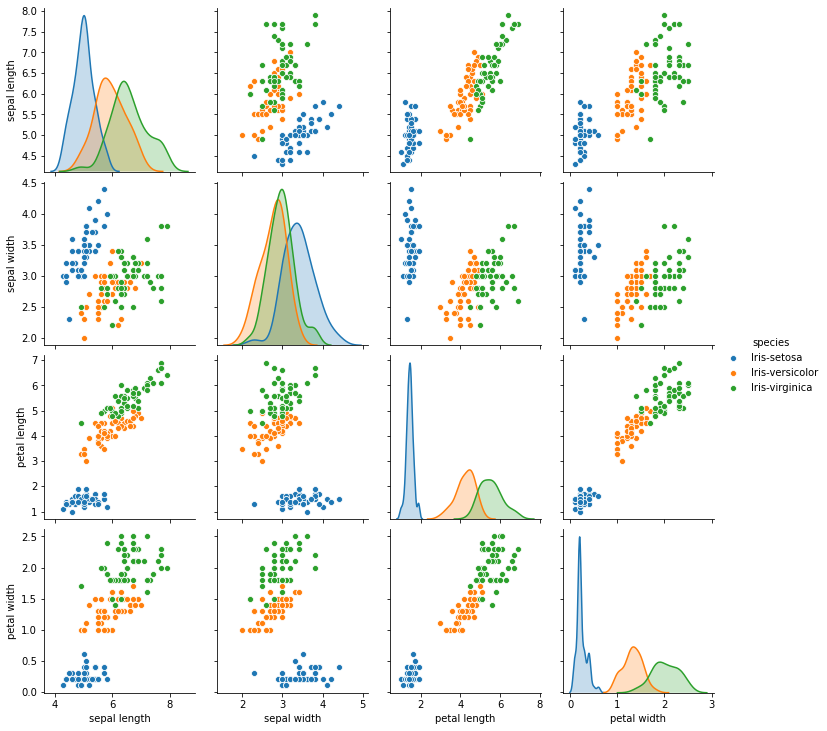

In [9]:
sns.pairplot(df, hue = 'species')

### Splitting data into training and testing      
After EDA we are splitting data into two parts for model creation.    
Conventionally X and y are used to denote, training and testing set.      

```     
df.drop(column_name, axis = 1)     
******************************       
This command is used to delete a column. axis = 1 means column only.      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)    
**********************************************************************************************      
Here datasets having prefix "X" are training sets and having prefix "y" are testing sets.   

test_size ==> This indicates the spilt ratio for training and testing sets.  
              In this case training to testing ratio is 70:30.  

```

In [10]:
X = df.drop('species', axis = 1)
X.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1000000000,3.5000000000,1.4000000000,0.2000000000
1,4.9000000000,3.0000000000,1.4000000000,0.2000000000
2,4.7000000000,3.2000000000,1.3000000000,0.2000000000
3,4.6000000000,3.1000000000,1.5000000000,0.2000000000
4,5.0000000000,3.6000000000,1.4000000000,0.2000000000


In [11]:
y = df['species']
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


# Building Machine Learning Models
Here we are creating models for training and predictions.     
Usually all the algorithms implemented(models) have common method names for same funtions.    
Here **fit** methods are for training and **predict** methods are for predicitions.

#### Model 1 : Logistic Regression

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#### Model 2 : Random Forest Classifier

In [14]:
rfcl = RandomForestClassifier()
rfcl.fit(X_train, y_train)
y_pred_rf = rfcl.predict(X_test)

# Prediction by the Models

In [15]:
print("Prediction by model 1: ", lr.predict(X_train.iloc[10:15]))
print("\nActual Labels: \n", y_train.iloc[15:20])
print('Pred is', lr.predict([[3, 5, 4, 2]]))

Prediction by model 1:  ['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']

Actual Labels: 
 11     Iris-setosa   
113    Iris-virginica
123    Iris-virginica
12     Iris-setosa   
2      Iris-setosa   
Name: species, dtype: object
Pred is ['Iris-setosa']


In [16]:
print("Prediction by model 2: ", rfcl.predict(X_train.iloc[15:20]))
print("\nActual Labels: \n",y_train.iloc[15:20])
print('Pred is',  rfcl.predict([[3, 5, 4, 2]]))

Prediction by model 2:  ['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']

Actual Labels: 
 11     Iris-setosa   
113    Iris-virginica
123    Iris-virginica
12     Iris-setosa   
2      Iris-setosa   
Name: species, dtype: object
Pred is ['Iris-versicolor']


# Model Evaluation

### Accuracy Score
Accuracy score is a measure of predictions' correctness.    
A higher values is desired.    
Here **accuracy_score** method is used to calculate the accuracy.   

In [17]:
print("Logistic Regression: ",accuracy_score(y_pred_lr, y_test))
print("Random Forest: ", accuracy_score(y_pred_rf, y_test))

Logistic Regression:  0.9777777777777777
Random Forest:  0.9555555555555556


### Confusion Matrix    
A confusion matrix is a summary of prediction results on a classification problem.  
Here **confusion_matrix** method is used to calculate the accuracy.     
While predicting any value, we can have four possible outcomes:
1. True positive
1. True negative
1. False positive
1. False negative

The last two are highly undesirable.     
A good measure would be only non-zero values on the diagonal from top left to bottom right.

In [18]:
print("Logistic Regression: \n",confusion_matrix(y_pred_lr, y_test))
print("\nRandom Forest: \n",confusion_matrix(y_pred_rf, y_test))

Logistic Regression: 
 [[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]

Random Forest: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


### Classification Report    
Here we are showing the main classification metrics.     

```     
TP – True Positives           
TN – True Negatives
FP – False Positives           
FN – False Negatives                  

Precision – Accuracy of positive predictions.                  
Precision = TP/(TP + FP)     

Recall: Fraction of positives that were correctly identified.                          
Recall = TP/(TP+FN)                       

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Support is the number of actual occurrences of the class in the specified dataset

```

In [19]:
print("Logistic Regression: \n",classification_report(y_pred_lr, y_test))
print("\nRandom Forest: \n",classification_report(y_pred_rf, y_test))

Logistic Regression: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45


Random Forest: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

